In [8]:
import urllib
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import openapi

In [ ]:
import requests

# ✅ API 키 및 URL 설정
s_key = 'PwfNqgN7hal2oSaDMz96GOgjRcDcPrZUybaows5KKV1Xa0uMKVhAbb/e2y78IJMwQ+mHPTsZgjBVqkk54niRUA=='
url = 'http://apis.data.go.kr/B551172/Kidney08/kiDiabetesByType'

# ✅ 기본 파라미터 설정 (numOfRows를 정수로 변경)
params = {
    'serviceKey': s_key,
    'type': 'json',
    'numOfRows': 100,  # 🔹 문자열이 아닌 정수로 변경
    'centerNm': '국립암센터',
    'fromYear': '2010',
    'toYear': '2019',
    'pageNo': 1
}

all_data = []

# 1️⃣ 첫 번째 요청을 보내서 totalCount 확인
response = requests.get(url, params=params)

if response.status_code == 200:
    resp_dict = response.json()

    # 🔹 totalCount가 없을 경우 기본값 0으로 설정 (오류 방지)
    total_count = int(resp_dict.get('totalCount', 0) or 0)  
    items_per_page = params['numOfRows']  
    total_pages = (total_count // items_per_page) + (1 if total_count % items_per_page else 0)

    print(f"📌 총 데이터 개수: {total_count}, 가져올 페이지 수: {total_pages}")

    # ✅ 데이터가 없을 경우 메시지 출력 후 종료
    if total_count == 0:
        print("⚠️ 가져올 데이터가 없습니다.")
    else:
        # 2️⃣ total_pages 만큼 반복하여 모든 데이터를 가져오기
        for i in range(1, total_pages + 1):
            page_params = params.copy()  # 🔹 원본 params 보호
            page_params['pageNo'] = i  

            response = requests.get(url, params=page_params)

            if response.status_code == 200:
                resp_dict = response.json()
                items = resp_dict.get('items', [])  # 🔹 데이터가 없을 경우 빈 리스트 반환
                all_data.extend(items)
                print(f"📄 페이지 {i}/{total_pages} 처리 완료! (누적 {len(all_data)}개)")
            else:
                print(f"❌ 데이터 요청 실패 (페이지 {i}) - HTTP 코드: {response.status_code}")

        print(f"✅ 총 {len(all_data)}개의 데이터 수집 완료!")

else:
    print(f"❌ API 요청 실패 - HTTP 상태 코드: {response.status_code}")

# 📊 수집한 데이터를 pandas DataFrame으로 변환
if all_data:
    df = pd.DataFrame(all_data)
    print(df.head())  # ✅ 데이터 미리보기 (상위 5개)
else:
    print("❌ 저장할 데이터가 없습니다.")

📌 총 데이터 개수: 1134, 가져올 페이지 수: 12
📄 페이지 1/12 처리 완료! (누적 100개)
📄 페이지 2/12 처리 완료! (누적 200개)
📄 페이지 3/12 처리 완료! (누적 300개)
📄 페이지 4/12 처리 완료! (누적 400개)
📄 페이지 5/12 처리 완료! (누적 500개)
📄 페이지 6/12 처리 완료! (누적 600개)
📄 페이지 7/12 처리 완료! (누적 700개)
📄 페이지 8/12 처리 완료! (누적 800개)
📄 페이지 9/12 처리 완료! (누적 900개)
📄 페이지 10/12 처리 완료! (누적 1000개)
📄 페이지 11/12 처리 완료! (누적 1100개)
📄 페이지 12/12 처리 완료! (누적 1134개)
✅ 총 1134개의 데이터 수집 완료!
  statsMetaNo centerNm critYr ptAge ptSexCd statsTrgtNm ncsNmvl wholNcsDnmvl  \
0       17080    국립암센터   2012    72       M           Y       1            6   
1       17080    국립암센터   2012    31       F           N       1            1   
2       17080    국립암센터   2011    71       M           N       8            9   
3       17080    국립암센터   2011    74       M           Y       2            7   
4       17080    국립암센터   2016    44       M           N       3            3   

  ptCntNmvl wholPtCntDnmvl  
0         1              6  
1         1              1  
2         8              9  
3      

In [10]:
df_sugar = pd.DataFrame(all_data)
df_sugar

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,17080,국립암센터,2012,72,M,Y,1,6,1,6
1,17080,국립암센터,2012,31,F,N,1,1,1,1
2,17080,국립암센터,2011,71,M,N,8,9,8,9
3,17080,국립암센터,2011,74,M,Y,2,7,2,7
4,17080,국립암센터,2016,44,M,N,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
1129,17080,국립암센터,2015,41,M,N,1,1,1,1
1130,17080,국립암센터,2013,33,F,N,1,1,1,1
1131,17080,국립암센터,2019,64,M,Y,1,8,1,8
1132,17080,국립암센터,2014,48,F,N,2,2,2,2


In [11]:
df_sugar = df_sugar.iloc[:, [1,2,3,4,5,-2]]
df_sugar

,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ptCntNmvl
0,국립암센터,2012,72,M,Y,1
1,국립암센터,2012,31,F,N,1
2,국립암센터,2011,71,M,N,8
3,국립암센터,2011,74,M,Y,2
4,국립암센터,2016,44,M,N,3
...,...,...,...,...,...,...
1129,국립암센터,2015,41,M,N,1
1130,국립암센터,2013,33,F,N,1
1131,국립암센터,2019,64,M,Y,1
1132,국립암센터,2014,48,F,N,2


In [12]:
df_sugar.rename(columns={'statsTrgtNm':'당뇨병 병력 여부', 'ptCntNmvl': '환자수'}, inplace=True)
df_sugar

C:\Users\human\AppData\Local\Temp\ipykernel_7972\3261100684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sugar.rename(columns={'statsTrgtNm':'당뇨병 병력 여부', 'ptCntNmvl': '환자수'}, inplace=True)


,centerNm,critYr,ptAge,ptSexCd,당뇨병 병력 여부,환자수
0,국립암센터,2012,72,M,Y,1
1,국립암센터,2012,31,F,N,1
2,국립암센터,2011,71,M,N,8
3,국립암센터,2011,74,M,Y,2
4,국립암센터,2016,44,M,N,3
...,...,...,...,...,...,...
1129,국립암센터,2015,41,M,N,1
1130,국립암센터,2013,33,F,N,1
1131,국립암센터,2019,64,M,Y,1
1132,국립암센터,2014,48,F,N,2


In [13]:
df_sugar.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별'}, inplace=True)
df_sugar

C:\Users\human\AppData\Local\Temp\ipykernel_7972\1679474095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sugar.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별'}, inplace=True)


,센터 이름,기준 년도,연령,성별,당뇨병 병력 여부,환자수
0,국립암센터,2012,72,M,Y,1
1,국립암센터,2012,31,F,N,1
2,국립암센터,2011,71,M,N,8
3,국립암센터,2011,74,M,Y,2
4,국립암센터,2016,44,M,N,3
...,...,...,...,...,...,...
1129,국립암센터,2015,41,M,N,1
1130,국립암센터,2013,33,F,N,1
1131,국립암센터,2019,64,M,Y,1
1132,국립암센터,2014,48,F,N,2


In [14]:
df_sugar['환자수'] = pd.to_numeric(df_sugar['환자수'], errors='coerce')

df_sugar['환자수'] = df_sugar['환자수'].fillna(0).astype(int)

sugar_count = df_sugar.groupby(df_sugar['당뇨병 병력 여부'].fillna('무응답'))['환자수'].sum()

print(sugar_count)

당뇨병 병력 여부
N      2033
Y       416
무응답      35
Name: 환자수, dtype: int64


C:\Users\human\AppData\Local\Temp\ipykernel_7972\2414265215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sugar['환자수'] = pd.to_numeric(df_sugar['환자수'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_7972\2414265215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sugar['환자수'] = df_sugar['환자수'].fillna(0).astype(int)


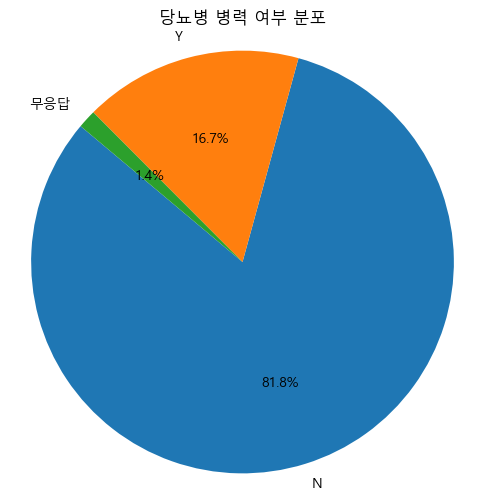

In [15]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sugar_count.values, labels=sugar_count.index, autopct='%1.1f%%', startangle=140)
plt.title('당뇨병 병력 여부 분포')
plt.axis('equal')
plt.show()